In [162]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
inmuebles = pd.read_csv('inmuebles_bogota.csv')

In [164]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
4738,Casa,Casa en venta en Puente Aranda,3,3,264,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 650.000.000
5858,Apartamento,Apartamento en venta en Santa Barbara,1,2,55,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 388.000.000
4526,Apartamento,Apartamento en venta en Barrios Unidos,3,3,120,Barrios Unidos,Los Andes,$ 518.000.000
4014,Casa,Casa en venta en Zona Noroccidental,5,4,245,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
5631,Apartamento,Apartamento en venta en Usaquén,2,2,80,Usaquén,Usaquén,$ 349.000.000


In [165]:
columnas = {
    'Baños':'Banos',
    'Área':'Area'
    }
inmuebles = inmuebles.rename(columns=columnas)

In [166]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [167]:
v1 = inmuebles['Valor'][0]
v2 = inmuebles['Valor'][1]
v3 = inmuebles['Valor'][:5]
valor_suma_inmuebles = v1 + v2 + v3
valor_suma_inmuebles

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [168]:
inmuebles['Valor'][0].split()

['$', '360.000.000']

In [169]:
valor = inmuebles['Valor'].str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

In [170]:
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
3416,Apartamento,Apartamento en venta en Cedritos,3,2,75,Cedritos,Usaquén,$ 420.000.000,$,420.000.000
3711,Apartamento,Apartamento en venta en Bosa,2,1,45,Bosa,Bosa Central,$ 115.500.000,$,115.500.000
620,Apartamento,Apartamento en venta en Bosa,3,1,56,Bosa,Bosa Central,$ 150.000.000,$,150.000.000


In [171]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [172]:
inmuebles['Precio'].sum()

'360.000.000670.000.0001.120.000.000890.000.000970.000.000510.000.000500.000.0002.350.000.000850.000.000642.000.000652.000.000168.000.000205.000.000300.000.000680.000.0002.519.000.000420.000.000620.000.000239.000.0001.600.000.000420.000.000625.000.0002.799.000.0001.450.000.0002.000.000.000670.000.0001.800.000.000469.000.000580.000.000445.000.000261.500.000278.000.000258.000.000520.000.000200.000.000129.000.000350.000.000290.500.000750.000.000495.000.000285.000.000900.000.0001.800.000.000990.000.000418.000.000349.000.000565.000.000370.000.000259.000.000310.000.000354.000.000372.000.000500.000.000420.000.0001.050.000.000185.000.000349.000.000515.000.000287.000.000265.000.000500.000.000261.500.000300.000.000278.000.000258.000.000520.000.000350.000.000290.500.000129.000.000200.000.000750.000.000418.000.000495.000.000349.000.000310.000.000565.000.000370.000.000259.000.000354.000.000285.000.000420.000.000372.000.000500.000.000185.000.0001.050.000.000349.000.0001.800.000.000900.000.000990.000

In [173]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [174]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [175]:
inmuebles['Precio_Millon'] = inmuebles['Precio'].astype('float')/1000000

In [176]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.3+ KB


In [177]:
inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00


In [178]:
sum(inmuebles['Precio_Millon'])

5731633.605583001

In [179]:
round(inmuebles['Precio_Millon'].mean(), 2)

602.06

In [180]:
inmuebles[['Precio_Millon']].describe()

,Precio_Millon
count,9520.00
mean,602.06
std,704.60
min,60.00
25%,250.00
50%,409.18
75%,680.00
max,16000.00


2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

In [181]:
STD = inmuebles['Precio_Millon'].std()
print(f'La desviación estándar de los precios es: {round(STD)}')

La desviación estándar de los precios es: 705


In [182]:
media = inmuebles['Precio_Millon'].mean()
print(f'La media de los precios es: {round(media, 2)}')

La media de los precios es: 602.06


In [183]:
precio_maximo = inmuebles['Precio_Millon'].max()
print(f'El precio máximo de un inmueble en los registros es: {precio_maximo} millones')

El precio máximo de un inmueble en los registros es: 16000.0 millones


In [184]:
precio_minimo = inmuebles['Precio_Millon'].min()
print(f'El precio mínimo de un inmueble en los registros es: {precio_minimo} millones')

El precio mínimo de un inmueble en los registros es: 60.0 millones


In [185]:
round(inmuebles.describe(), 2)

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [186]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x :'%.2f' % x)

In [187]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [188]:
inmuebles.loc[inmuebles['Habitaciones'] == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [189]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [190]:
inmuebles[inmuebles['Area'] == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


In [191]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


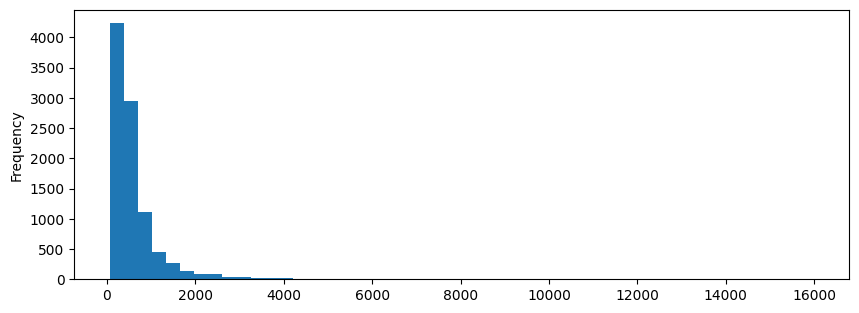

In [192]:
plt.figure(figsize=(10,3.5))
inmuebles['Precio_Millon'].plot.hist(bins=50);

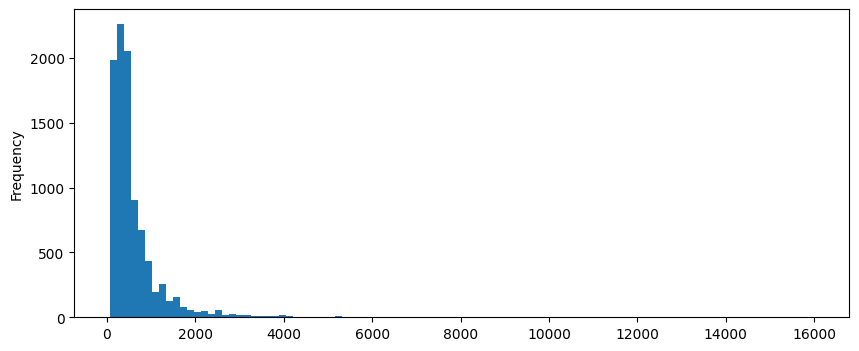

In [193]:
plt.figure(figsize=(10,4))
inmuebles['Precio_Millon'].plot.hist(bins=100);

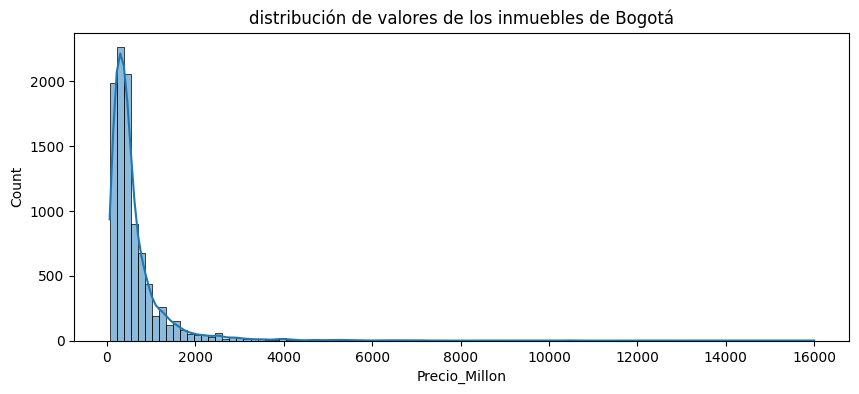

In [223]:
plt.figure(figsize=(10,4))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',bins=100, kde=True);
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
plt.show()


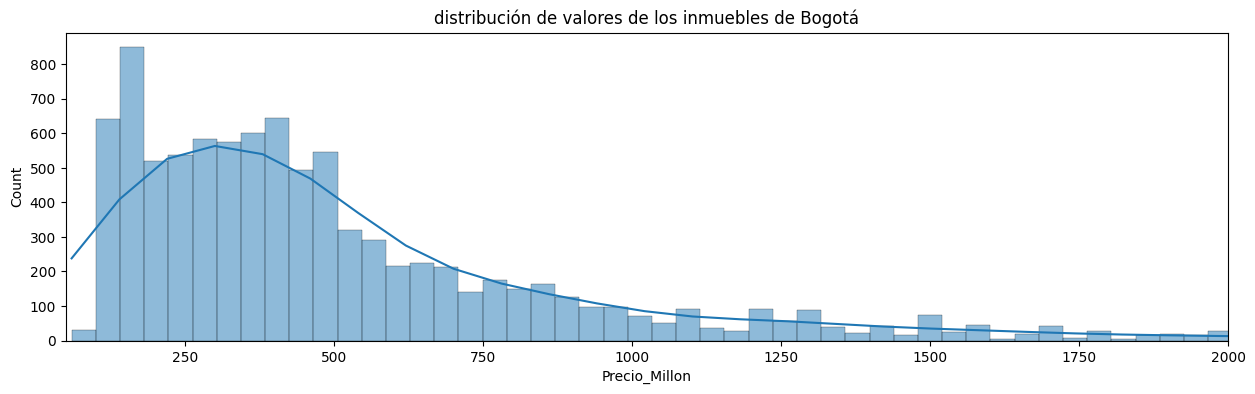

In [222]:
plt.figure(figsize=(15,4))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True);
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
plt.xlim((50,2000))
plt.show()

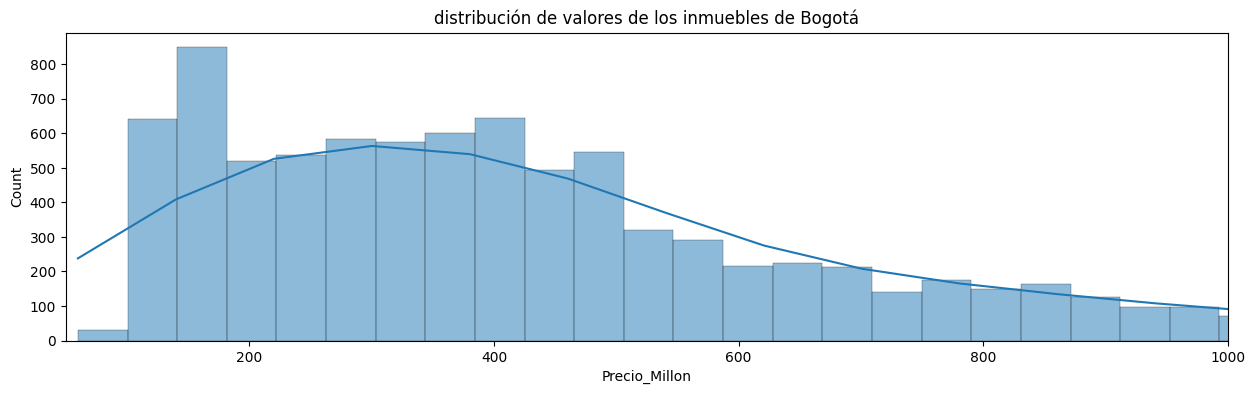

In [225]:
plt.figure(figsize=(15,4))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True);
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
plt.xlim((50,1000))
plt.savefig('../InmersionDeDatosAlura/valor_inmueble.png',format='png')
plt.show()

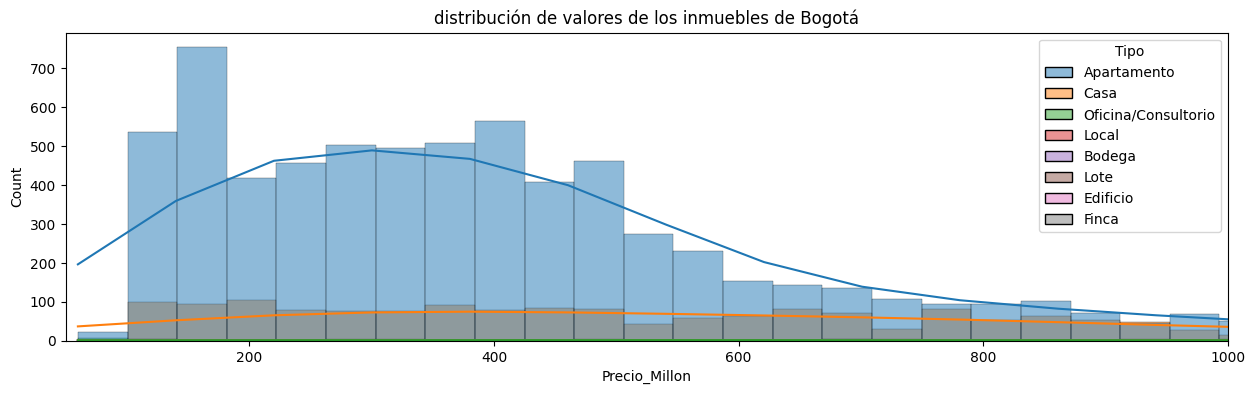

In [226]:
plt.figure(figsize=(15,4))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo');
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
plt.xlim((50,1000))
plt.savefig('../InmersionDeDatosAlura/valor_inmueble.png',format='png')
plt.show()

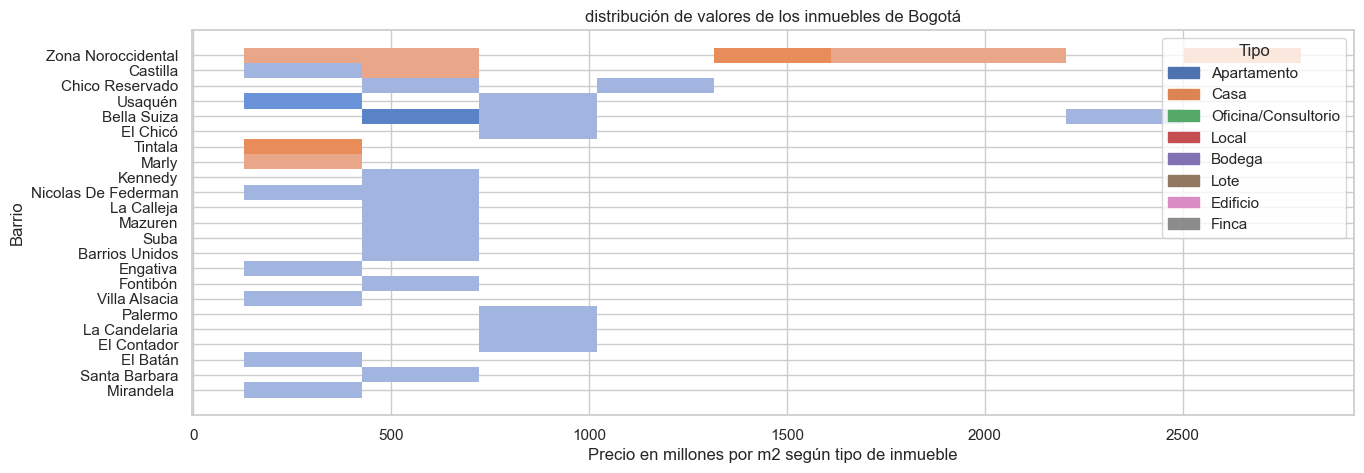

In [430]:
plt.figure(figsize=(15,5))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',y=inmuebles['Barrio'].head(50),kde=True,hue='Tipo');
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
# plt.xlim((50,1000))
plt.xlabel('Precio en millones por m2 según tipo de inmueble')
plt.savefig('../InmersionDeDatosAlura/valor_inmueble.png',format='png')
plt.show()

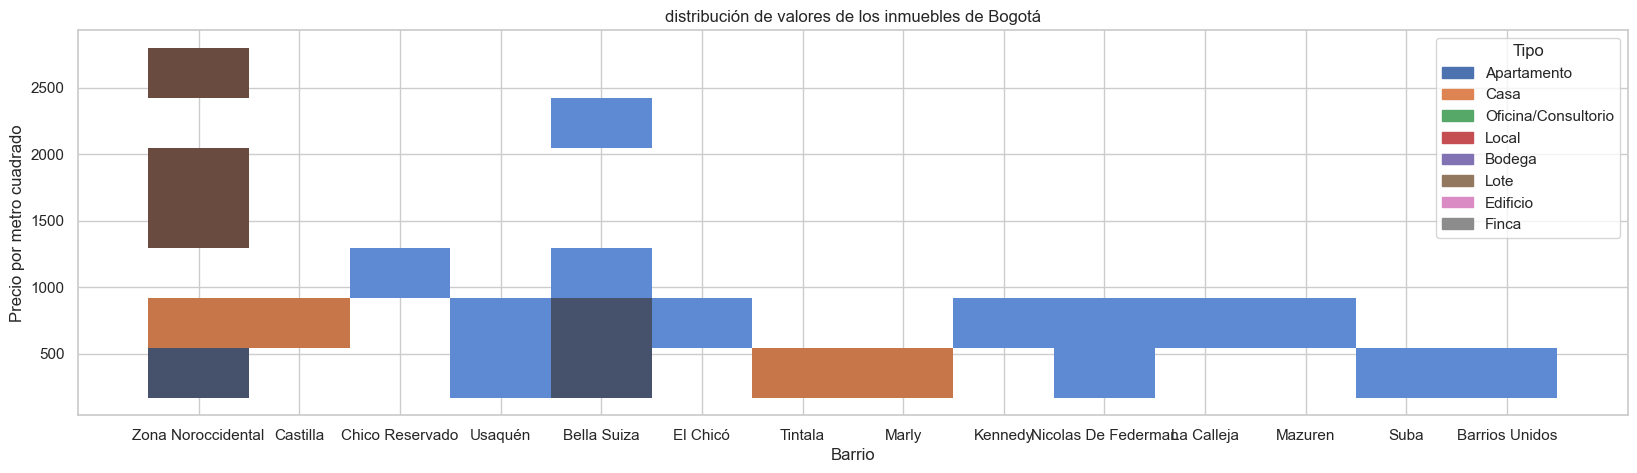

In [379]:
plt.figure(figsize=(20,5))
grafica = sns.histplot(data=inmuebles, x=inmuebles['Barrio'].head(30),y=inmuebles['Precio_Millon'].head(30),kde=True,hue='Tipo');
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
plt.ylabel('Precio por metro cuadrado')
plt.show()

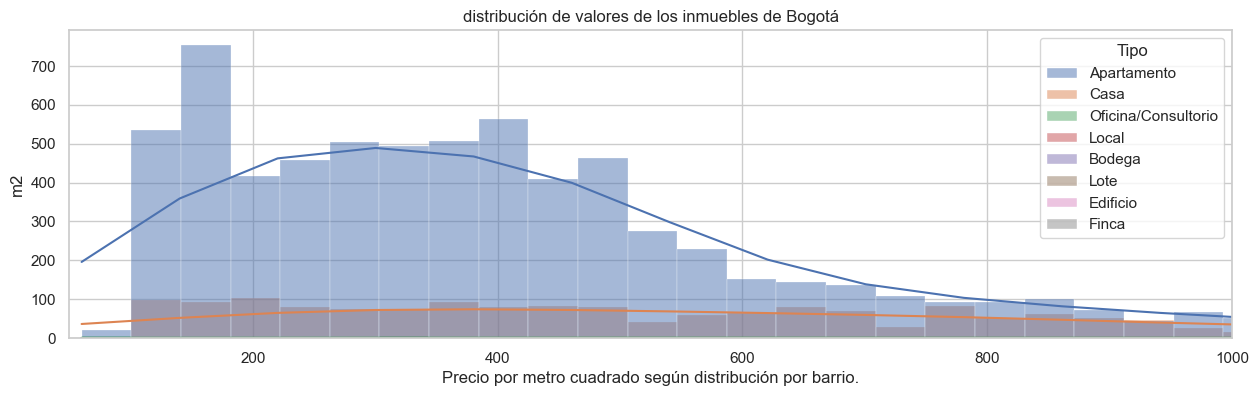

In [378]:
plt.figure(figsize=(15,4))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo');
grafica.set_title('distribución de valores de los inmuebles de Bogotá')
plt.ylabel('m2')
plt.xlabel('Precio por metro cuadrado según distribución por barrio.')
plt.xlim((50,1000))
plt.savefig('../InmersionDeDatosAlura/valor_inmueble.png',format='png')
plt.show()

In [419]:
# Necesito calcular el precio por metro cuadrado y para ello necesito agrupar por barrios la suma de las 
# columnas denominadas PrecioMillon y Area, lo anterior lo realizo escribiendo el siguiente código:
BarrioAcumulado=inmuebles[['Barrio','Area','Precio_Millon']].groupby(['Barrio']).sum()
BarrioAcumulado['Precio por Metro Cuadrado']=BarrioAcumulado['Precio_Millon']/BarrioAcumulado['Area']
BarrioAcumulado.head()


,Area,Precio_Millon,Precio por Metro Cuadrado
Barrio,,,
Alameda,97,580.00,5.98
Alhambra,3237,12790.00,3.95
Andes Norte,874,4967.00,5.68
Antonio Nariño,7827,22042.65,2.82
Barrancas,1053,4712.00,4.47


In [420]:
# Ahora deseo que el index Barrio aparezca como columna y luego seleccionar solo la columna Barrio junto con la columna 
# llamada Precio por Metro Cuadrado y para ello escribo el siguiente código:
BarrioValorMetroCuadrado=BarrioAcumulado.reset_index()[['Barrio','Precio por Metro Cuadrado']]
BarrioValorMetroCuadrado.sort_values(by=['Precio por Metro Cuadrado'], ascending=False).tail(10)

,Barrio,Precio por Metro Cuadrado
134,Timiza,2.33
113,Rafael Uribe Uribe,2.33
56,Galicia,2.25
144,Villa Maria,1.94
127,Santa Librada,1.93
80,Las Ferias,1.72
83,Libertador,1.59
116,Roma,1.35
11,Bosa Piamonte,1.18
92,Modelia,0.16


In [421]:
# Ahora necesito crear gráficos para mostrar la data de manera más amigable. Para ello crearé un primer 
# gráfico solo para el TOP 10 de precios mayores por metro cuadrado y luego crearé un gráfico combinado en el cual
# muestro el TOP 10 de precios mayores por metro cuadrado y TOP 10 de precios menores por metro cuadrado.

# Para crear el primer gráfico el cual corresponde al TOP 10 de precios mayores por metro cuadrado necesito crear antes 
# el DataFrame con el TOP 10 de precios mayores por metro cuadrado y para ello escribo el siguiente código:
top10=BarrioValorMetroCuadrado.sort_values(by=['Precio por Metro Cuadrado'], ascending=False).head(10)

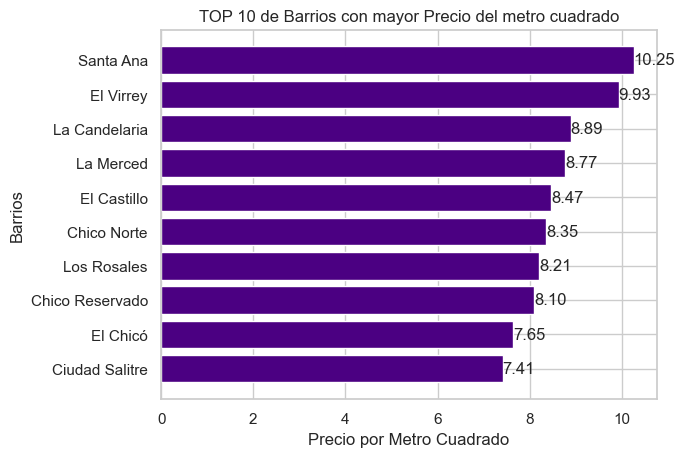

In [422]:
plt.barh(top10['Barrio'], top10['Precio por Metro Cuadrado'],color='indigo')
plt.gca().invert_yaxis()
plt.title('TOP 10 de Barrios con mayor Precio del metro cuadrado')
plt.xlabel('Precio por Metro Cuadrado')
plt.ylabel('Barrios')
for valor, categoria in zip(top10['Precio por Metro Cuadrado'], top10['Barrio']):
    plt.text(valor, categoria, str('%.2f' %valor), ha='left', va='center')

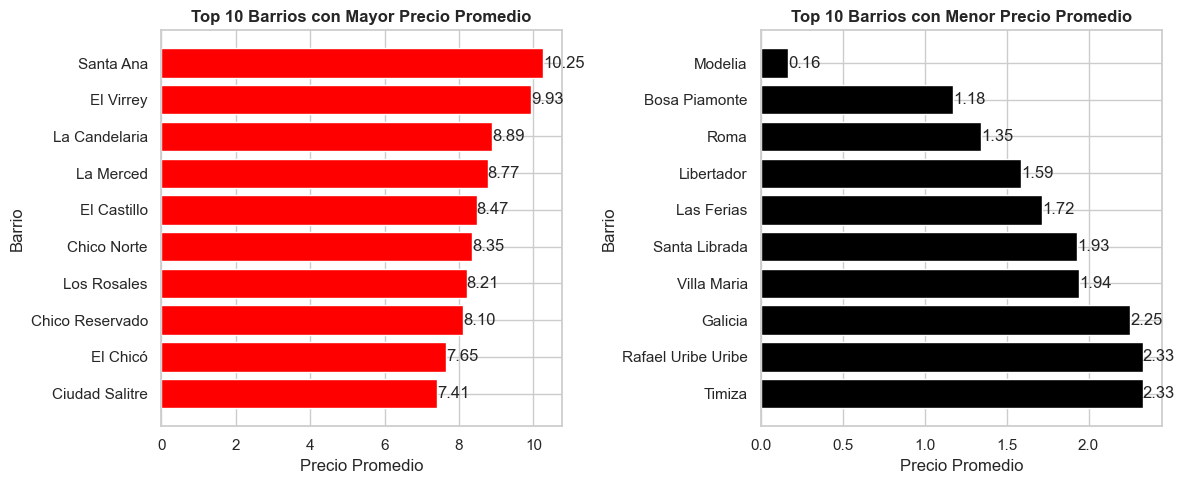

In [423]:
# Ahora crearé el gráfico combinado en el cual muestro al lado izquierdo el TOP 10 de Barrios
# con mayor Precio del metro cuadrado y al lado derecho muestro
# TOP 10 de Barrios con menor Precio del metro cuadrado. Para ello escribo el siguiente código:
inmuebles_mayor_precio = BarrioValorMetroCuadrado.sort_values(by=['Precio por Metro Cuadrado'], ascending=False).head(10)

inmuebles_menor_precio = BarrioValorMetroCuadrado.sort_values(by=['Precio por Metro Cuadrado']).head(10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico: Top 10 de barrios con mayor precio promedio
axs[0].barh(inmuebles_mayor_precio['Barrio'], inmuebles_mayor_precio['Precio por Metro Cuadrado'], color='red')
axs[0].invert_yaxis()
axs[0].set_xlabel('Precio Promedio')
axs[0].set_ylabel('Barrio')
axs[0].set_title('Top 10 Barrios con Mayor Precio Promedio',fontweight='bold')
for valor, categoria in zip(inmuebles_mayor_precio['Precio por Metro Cuadrado'], inmuebles_mayor_precio['Barrio']):
    axs[0].text(valor, categoria, str('%.2f' %valor), ha='left', va='center')

# Segundo gráfico: Top 10 de barrios con menor precio promedio
axs[1].barh(inmuebles_menor_precio['Barrio'], inmuebles_menor_precio['Precio por Metro Cuadrado'], color='black')
axs[1].invert_yaxis()
axs[1].set_xlabel('Precio Promedio')
axs[1].set_ylabel('Barrio')
axs[1].set_title('Top 10 Barrios con Menor Precio Promedio',fontweight='bold')
for valor, categoria in zip(inmuebles_menor_precio['Precio por Metro Cuadrado'], inmuebles_menor_precio['Barrio']):
    axs[1].text(valor, categoria, str('%.2f' %valor), ha='left', va='center')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

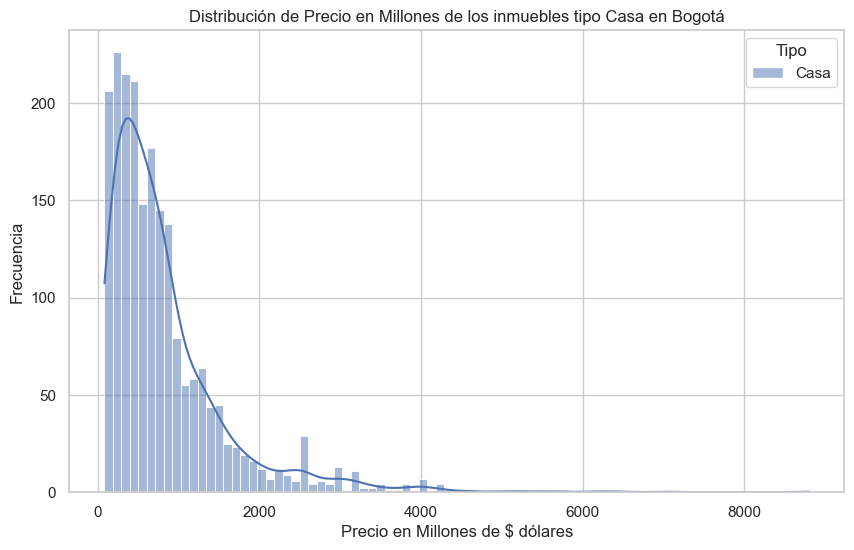

In [426]:
plt.figure(figsize=(10,6))
grafica1 = sns.histplot(data=inmuebles[inmuebles['Tipo']=='Casa'], x='Precio_Millon', kde=True, hue='Tipo')
grafica1.set(title='Distribución de Precio en Millones de los inmuebles tipo Casa en Bogotá')
plt.xlabel('Precio en Millones de $ dólares')
plt.ylabel('Frecuencia');

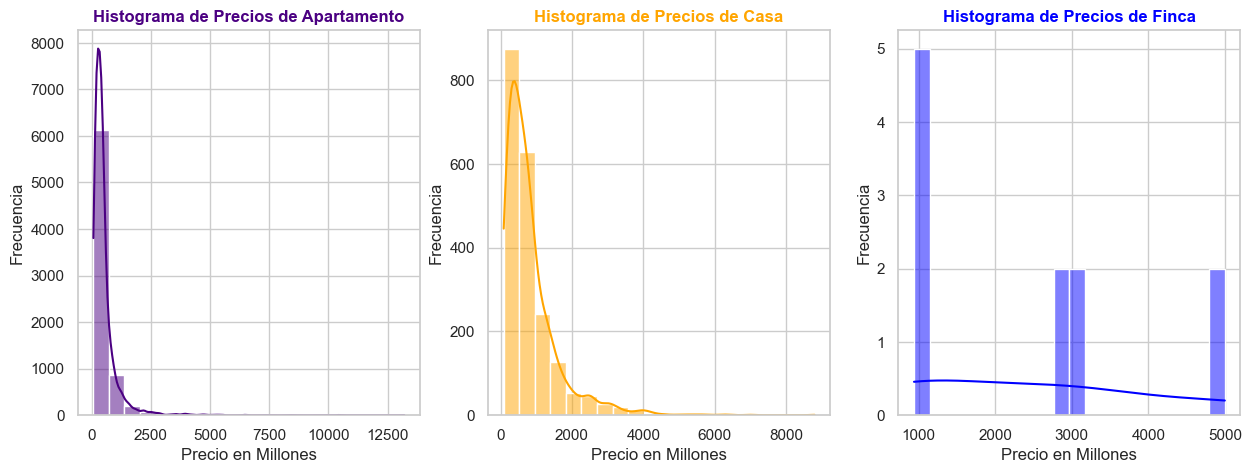

In [428]:
arrayTipo=['Apartamento','Casa','Finca']
colores = ['indigo', 'orange', 'blue']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, tipo in enumerate(arrayTipo):
    datos_tipo = inmuebles[inmuebles['Tipo'] == tipo]
    sns.histplot(data=datos_tipo, x='Precio_Millon', bins=20, kde=True, ax=axs[i],color=colores[i])
    axs[i].set_xlabel('Precio en Millones')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title(f'Histograma de Precios de {tipo}', fontweight='bold', color=colores[i])
plt.show()